# Visualisierung von DataFrames

## Lernziele

```{admonition} Lernziele
:class: important
* Sie können den Zeilenindex **.index**, den Spaltenindex **.columns** und die
  Werte der Zellen **.values** aus dem DataFrame extrahieren.
* Sie können mit der Methode **.axhline().** zu einem Plot eine horizontale
  Linie hinzufügen.
* Sie können die Fehlerbalken mit **errorbar()** visualisieren.
```

## Array aus Tabelle extrahieren

Aber wie kombinieren wir jetzt die Funktionalitäten des Pandas-Moduls mit denen
des Matplotlib-Moduls? Der grundlegende Datentyp für Matplotlib ist das
NumPy-Array und auch in den Pandas-Datenobjekten stecken im Kern NumPy-Arrays.
Wenn wir also Pandas-Objekte visualisieren wollen, extrahieren wir die Daten als
NumPy-Arrays und plotten dann diese mit Matploblib.

Wir benutzen die folgenden Methoden: 

* ``.index`` liefert den Zeilenindex
* ``.columns`` liefert die Spaltennamen 
* ``.values`` liefert die Werten in der Tabelle als NumPy-Array

Wir verwenden wieder einen realistischen Datensatz und importieren den uns
schon bekannten Datensatz der Top7-Fußballvereine der Bundesliga 2020/21.

In [1]:
import pandas as pd

data = pd.read_csv('bundesliga_top7_offensive.csv', index_col=0)

print('Zeilenindex: ')
print(data.index)

print('Spaltenindex:')
print(data.columns)

print('Werte der Zellen in der Tabelle als Numpy-Array:')
print(data.values)

Zeilenindex: 
Index(['Manuel Neuer', 'Thomas Müller', 'David Alaba', 'Jérôme Boateng',
       'Robert Lewandowski', 'Joshua Kimmich', 'Kingsley Coman',
       'Benjamin Pavard', 'Alphonso Davies', 'Serge Gnabry',
       ...
       'Petar Musa', 'Florian Hübner', 'Cedric Teuchert', 'Keita Endo',
       'Niko Gießelmann', 'Loris Karius', 'Akaki Gogia', 'Leon Dajaku',
       'Tim Maciejewski', 'Joshua Mees'],
      dtype='object', name='Name', length=177)
Spaltenindex:
Index(['Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts', 'Mins',
       'Goals', 'Assists', 'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA',
       'Yellow_Cards', 'Red_Cards'],
      dtype='object')
Werte der Zellen in der Tabelle als Numpy-Array:
[['Bayern Munich' 'GER' 'GK' ... 0.01 1 0]
 ['Bayern Munich' 'GER' 'MF' ... 0.39 0 0]
 ['Bayern Munich' 'AUT' 'DF,MF' ... 0.08 4 0]
 ...
 ['Union Berlin' 'GER' 'FW' ... 0.0 0 0]
 ['Union Berlin' 'GER' 'MF' ... 0.0 0 0]
 ['Union Berlin' 'GER' 'FW' ... 0.0 0 0]]


So kann man direkt die Daten aus einem Pandas-DataFrame extrahieren und
visualisieren. Wenn wir beispielsweise wissen wollen, wie alt die Spieler der
Eintracht Frankfurt sind, filtern wir zuerst. Danach stellen wir auf der x-Achse
die Namen der Spieler (= Zeilenindex) dar und auf der y-Achse das Alter ('Age').
Da es sich bei den Spielern um Kategorien, also diskrete Daten handelt,
verwenden wir ein Balkendiagramm.

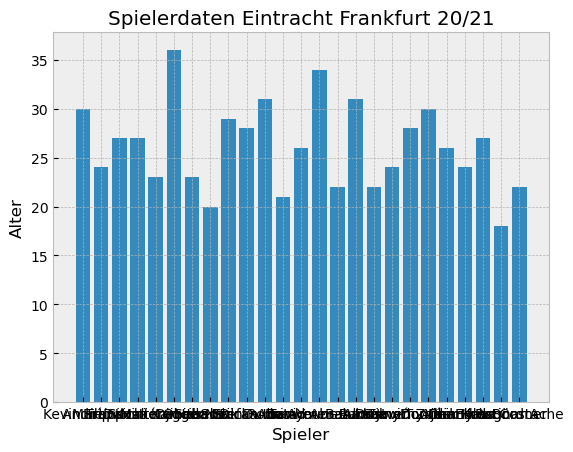

In [2]:
import matplotlib.pylab as plt
plt.style.use('bmh')

# data
filter = data.loc[:, 'Club'] == 'Eintracht Frankfurt'
data_eintracht_frankfurt = data.loc[filter, :]
x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt.loc[:, 'Age']

# plot
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_xlabel('Spieler')
ax.set_ylabel('Alter')
ax.set_title('Spielerdaten Eintracht Frankfurt 20/21');

Leider kann man die Spielernamen nicht mehr lesen. Wir können händisch in das
Styling der x-Achsenbeschriftung eingreifen und die die Beschriftung um 45 Grad
drehen. Dann sieht der Code folgendermaßen aus:

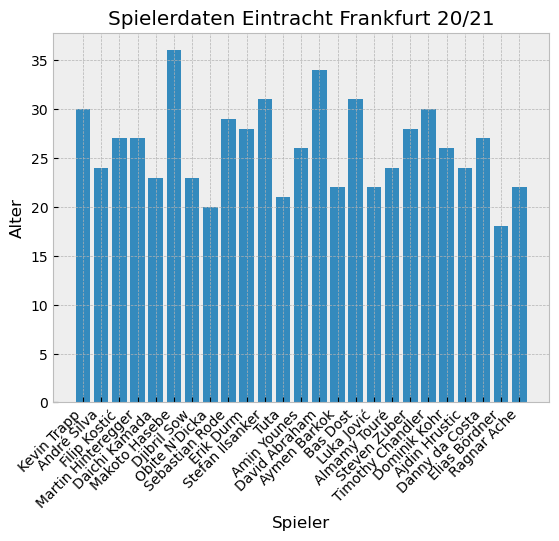

In [3]:
# plot
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_xlabel('Spieler')
ax.set_ylabel('Alter')
ax.set_title('Spielerdaten Eintracht Frankfurt 20/21')
ax.xaxis.set_ticks(x)                                   # rotiert die x-Achsenbeschriftung
ax.set_xticklabels(x, rotation = 45, ha="right");       # um 45 Grad

## Plot vom Mittelwert als horizontale Linie

Als nächstes möchten wir in den Plot Zusatzinformationen mit einblenden. So
würden wir gerne sichtbar machen, wo das Durchschnittsalter der Fußballspieler
liegt. Dadurch können wir schnell ablesen, welcher Spieler über dem Durchschnitt
liegt und welcher jünger als der Durchschnitt ist.

Dazu müssen wir zunächst die Zusatzinformation aus den Daten herausholen, sprich
den Mittelwert des Alters berechnen lassen.

In [4]:
mittelwert_alter = data_eintracht_frankfurt.loc[:, 'Age'].mean()
print('Mittleres Alter der Spieler: {}'.format(mittelwert_alter))

Mittleres Alter der Spieler: 26.12


Und nun ergänzen wir den Plot der Altersangaben mit dem Mittelwert. Dazu
zeichnen wir eine horizontale Linie mit der Höhe des Altersdurchschnitts. Dazu
verwenden wir die Methode `.axhline()`.

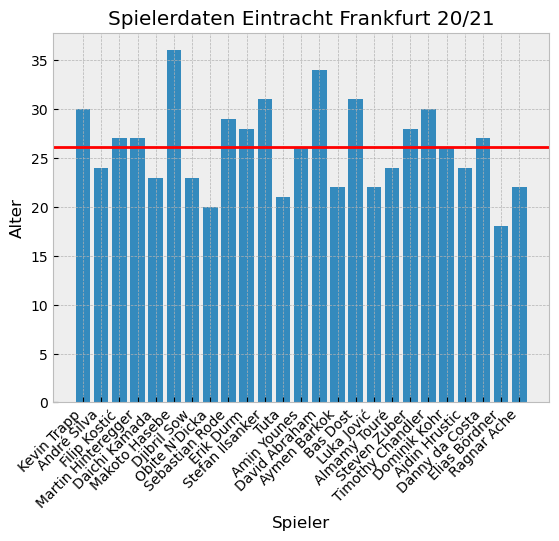

In [5]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_xlabel('Spieler')
ax.xaxis.set_ticks(x)                               # rotiert die x-Achsenbeschriftung
ax.set_xticklabels(x, rotation = 45, ha="right")    # um 45 Grad
ax.set_ylabel('Alter')
ax.set_title('Spielerdaten Eintracht Frankfurt 20/21')
# horizontale Linie
ax.axhline(mittelwert_alter, color='red');

## Plot der Standardabweichung als Fehlerbalken

Bei allen Messungen treten Messfehler auf. Manchmal weiß man von Anfang an,
welchen Messfehler das Messgerät hat. Ein anderes Mal hat man beispielsweise
eine Messung zehnmal wiederholt und möchte nun den Mittelwert als Datenpunkt und
die Standardabweichung der Messergebnisse als Fehlerbalken visualisieren. Durch
die Angabe eines Fehlerbalkens kann man dem Betrachter eine Zusatzinformation
mitteilen. Für die Darstellung von Fehlerbalken stellt das Matplotlib-Modul die
Methode ``errorbar()`` zur Verfügung. Mehr Informationen gibt es auf der
Hilfeseite

> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

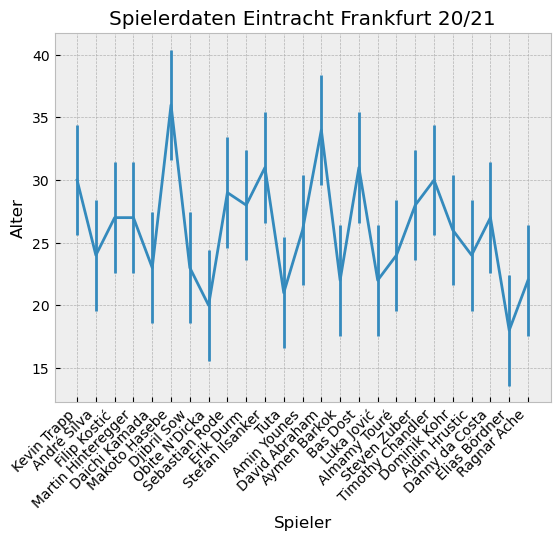

In [6]:
# data
standardabweichung_alter = data_eintracht_frankfurt.loc[:, 'Age'].std()

# plot data
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=standardabweichung_alter)
# styling
ax.set_xlabel('Spieler')
ax.xaxis.set_ticks(x)                               # rotiert die x-Achsenbeschriftung
ax.set_xticklabels(x, rotation = 45, ha="right")    # um 45 Grad
ax.set_ylabel('Alter')
ax.set_title('Spielerdaten Eintracht Frankfurt 20/21');

Die Grafik sieht irritierend aus, da die Altersangben der Spieler verbunden
wurden. Ästhetischer und besser interpretierbar wird die Grafik, wenn wir noch
ein wenig an den Optionen herumschrauben. Van der Plas empfiehlt beispielsweise
die folgenden Optionen in seinem Buch "Data Science mit Python":

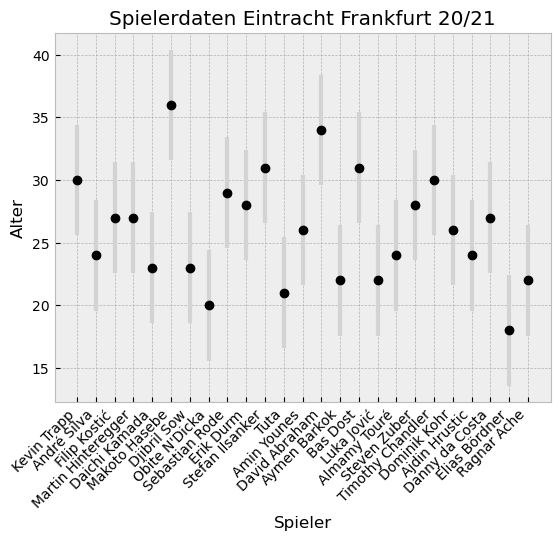

In [7]:
# plot data
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=standardabweichung_alter, fmt='o', color='black', 
ecolor='lightgray', elinewidth=3, capsize=0);
# styling
ax.set_xlabel('Spieler')
ax.xaxis.set_ticks(x)                               # rotiert die x-Achsenbeschriftung
ax.set_xticklabels(x, rotation = 45, ha="right")    # um 45 Grad
ax.set_ylabel('Alter')
ax.set_title('Spielerdaten Eintracht Frankfurt 20/21');

## Zusammenfassung und Ausblick

Nachdem wir uns erarbeitet haben, wie Daten aus einem DataFrame für eine
Visualisierung mit Matplotlib aufbereitet werden, lernen wir im nächsten
Abschnitt noch einen weiteren Diagrammtyp kennen, das Histogramm.